In [71]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

import pandas as pd

#pd.read_csv('/content/drive/My Drive/Bahman.Group.csv')
#pd.read_csv('/content/drive/My Drive/Zamyad.csv')
#pd.read_csv('/content/drive/My Drive/Nirou.Moharreke.csv')
#pd.read_csv('/content/drive/My Drive/S_Pars.Khodro.csv')
#pd.read_csv('/content/drive/My Drive/S_IranKhodroDiesel.csv')

!pip install unidecode
!pip install jdatetime
!pip install khayyam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from unidecode import unidecode
import jdatetime
from khayyam import *
from sklearn.preprocessing import LabelEncoder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
#!pip install openpyxl

!pip install openpyxl==3.0.0
!pip install pandas
import pandas as pd
#CHANGE
df=pd.read_csv('/content/drive/MyDrive/social_data_files/tsetmc/Nasir.Machine.csv')

#df=pd.read_csv('/content/drive/MyDrive/social/IRO7IKDP0000-a.csv')
hashtag_df = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/social_data_files/telegram_data/khNasir.xlsx"))
hashtag_df.head()




,پایگاه داده,منتشر کننده,نام کاربری,لینک داشبورد,لینک اصلی,زمان انتشار,عنوان,خلاصه,متن,تعداد بازتاب,تعداد نمایش/واکنش,تعداد کامنت(برای خبر),تعداد لایک(برای کامنت و توییت),تعداد دیسلایک(برای کامنت),تعداد ریتوییت(برای توییتر),سنتیمنت اتوماتیک
0,telegram,نبض بورس,nabzebourse_ir,/record/70769255,https://telegram.me/nabzebourse_ir/54701,۱۱:۵۳:۴۸ ۱۴۰۰/۱۱/۱۰,NaN,🔹دریافت مجوز افزایش نرخ فروش محصولات #خنصیر\n#...,🔹دریافت مجوز افزایش نرخ فروش محصولات #خنصیر\n#...,0,1109,0,0,0,0,خنثی
1,telegram,📉سهام یاب📈,saham_yab63,/record/70769320,https://telegram.me/saham_yab63/21738,۱۱:۴۶:۰۵ ۱۴۰۰/۱۱/۱۰,NaN,😎💙#خنصیر دومین سیگنال نوسانی رانتی امروز کانال...,😎💙#خنصیر دومین سیگنال نوسانی رانتی امروز کانال...,1,973,0,0,0,0,منفی
2,telegram,ژورنال بازارهای مالی-مجتبی دیبا,classiccharts,/record/70769296,https://telegram.me/classiccharts/14189,۱۱:۲۲:۵۹ ۱۴۰۰/۱۱/۱۰,NaN,#خنصیر \nدر یک محدوده حمایتی,#خنصیر \nدر یک محدوده حمایتی,1,421,0,0,0,0,مثبت
3,telegram,ژورنال بازارهای مالی-مجتبی دیبا,classiccharts,/record/70769293,https://telegram.me/classiccharts/14188,۱۱:۲۰:۲۹ ۱۴۰۰/۱۱/۱۰,NaN,\n#خنصیر\n#افشای_اطلاعات_بااهمیت - (دریافت مجو...,\n#خنصیر\n#افشای_اطلاعات_بااهمیت - (دریافت مجو...,0,437,0,0,0,0,خنثی
4,telegram,بورس24 | Bourse24,bourse24ir,/record/70769187,https://telegram.me/bourse24ir/230345,۱۱:۱۶:۲۲ ۱۴۰۰/۱۱/۱۰,NaN,✅ نرخ فروش «خنصیر» بالا رفت\nبه گزارش کدال نگر...,✅ نرخ فروش «خنصیر» بالا رفت\nبه گزارش کدال نگر...,1,4175,0,0,0,0,خنثی


In [73]:
new_hashtag = pd.DataFrame(index=range(0,len(hashtag_df)),columns=['Date','view_count'])

In [74]:
for i in range(len(hashtag_df)):
  a = hashtag_df['زمان انتشار'][i]
  a = unidecode(a)
  # print(a)
  b=a.split()[1]
  # print(b)
  new_hashtag["Date"][i] = JalaliDatetime.strptime(b, '%Y/%m/%d').todate()
  new_hashtag['view_count'][i] = hashtag_df['تعداد نمایش/واکنش'][i] 

In [75]:
aggregated_hashtag_df = pd.DataFrame(index=range(0,1),columns=['Date','view_count'])

In [76]:
aggregated_hashtag_df = pd.DataFrame(index=range(0,1),columns=['Date','view_count'])

j = 0
for i in range(len(new_hashtag)):
  if i == j == 0:
    # _date = new_hashtag['Date'][i]
    # _view_count = new_hashtag['view_count'][i]
    # tmp_df = pd.DataFrame([[_date, _view_count]], columns=['Date','view_count'])
    # aggregated_hashtag_df.append(tmp_df)
    aggregated_hashtag_df['Date'][j] = new_hashtag['Date'][i]
    aggregated_hashtag_df['view_count'][j] = new_hashtag['view_count'][i]
    # print(len(aggregated_hashtag_df))
  elif new_hashtag['Date'][i] == new_hashtag['Date'][i - 1]:
    # print("j: ", j)
    aggregated_hashtag_df['view_count'][j] += new_hashtag['view_count'][i]
  else:
    j += 1
    _date = new_hashtag['Date'][i]
    _view_count = new_hashtag['view_count'][i]
    tmp_df = pd.DataFrame([[_date, _view_count]], columns=['Date','view_count'], index=[j])
    aggregated_hashtag_df=aggregated_hashtag_df.append(tmp_df)
    # print("len: ", len(aggregated_hashtag_df))
    # aggregated_hashtag_df['Date'][j] = new_hashtag['Date'][i]
    # aggregated_hashtag_df['view_count'][j] = new_hashtag['view_count'][i]



In [77]:
aggregated_hashtag_df.index = aggregated_hashtag_df['Date']
# print(aggregated_hashtag_df['Date'][1])

In [78]:
aggregated_hashtag_df.head()

,Date,view_count
Date,,
2022-01-30,2022-01-30,131486
2022-01-29,2022-01-29,9616
2022-01-28,2022-01-28,13685
2022-01-27,2022-01-27,31533
2022-01-26,2022-01-26,30603


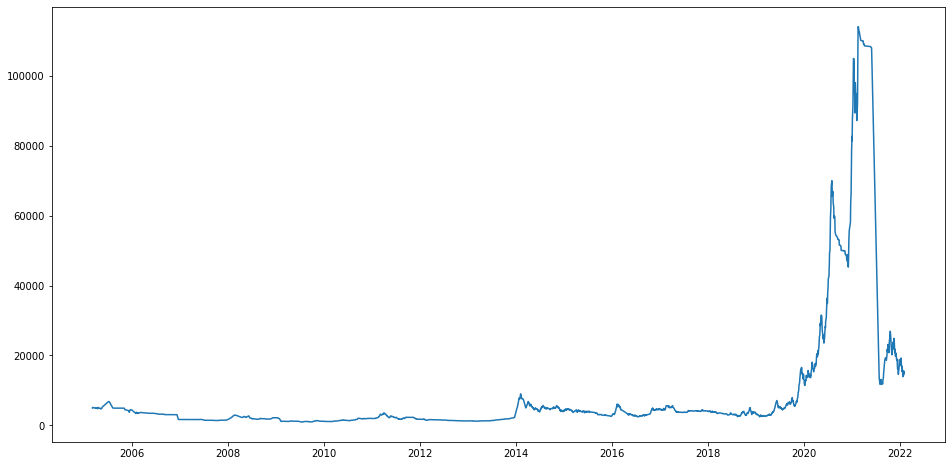

In [79]:
df["Date"]=pd.to_datetime(df["<DTYYYYMMDD>"],format="%Y%m%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["<CLOSE>"],label='Close Price history')

In [80]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close','Open','High','Vol','Low'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["<CLOSE>"][i]
    new_dataset["Open"][i]=data["<OPEN>"][i]
    new_dataset["High"][i]=data["<HIGH>"][i]
    new_dataset["Vol"][i]=data["<VOL>"][i]
    new_dataset["Low"][i]=data["<LOW>"][i]



In [81]:
tmp_dataset=new_dataset.copy()
tmp_dataset
tmp_dataset['Date'] = pd.to_datetime(tmp_dataset['Date']).dt.date
#tmp_dataset
tmp_dataset.set_index('Date', inplace = True)
tmp_dataset

,Close,Open,High,Vol,Low
Date,,,,,
2005-03-05,5000.0,0.0,5000.0,379185,5000.0
2005-03-06,5101.0,5000.0,5150.0,49473,5100.0
2005-03-07,5147.0,5101.0,5200.0,3748,5147.0
2005-03-08,5162.0,5147.0,5200.0,2315,5162.0
2005-03-09,5087.0,5162.0,5087.0,2331,4904.0
...,...,...,...,...,...
2022-01-26,13940.0,14160.0,14860.0,15895066,13460.0
2022-01-29,14360.0,13940.0,14630.0,10271960,13700.0
2022-01-30,14920.0,14360.0,15060.0,1696956,14640.0


In [82]:
#CHANGE
#idx = pd.date_range('2001-05-06', '2022-01-30')
idx = pd.date_range('2019-03-21', '2022-01-30')
tmp_dataset = tmp_dataset.reindex(idx, fill_value=0)
for i in range(len(tmp_dataset)):
  if tmp_dataset['Close'][i] == 0:
    tmp_dataset['Close'][i] = tmp_dataset['Close'][i-1]
  if tmp_dataset['Open'][i] == 0:
    tmp_dataset['Open'][i] = tmp_dataset['Open'][i-1]
  if tmp_dataset['High'][i] == 0:
    tmp_dataset['High'][i] = tmp_dataset['High'][i-1]
  if tmp_dataset['Vol'][i] == 0:
    tmp_dataset['Vol'][i] = tmp_dataset['Vol'][i-1]
  if tmp_dataset['Low'][i] == 0:
    tmp_dataset['Low'][i] = tmp_dataset['Low'][i-1]
  
tmp_dataset

,Close,Open,High,Vol,Low
2019-03-21,14920.0,14360.0,15060.0,1696956,14640.0
2019-03-22,14920.0,14360.0,15060.0,1696956,14640.0
2019-03-23,14920.0,14360.0,15060.0,1696956,14640.0
2019-03-24,14920.0,14360.0,15060.0,1696956,14640.0
2019-03-25,2731.0,2660.0,2793.0,1211664,2630.0
...,...,...,...,...,...
2022-01-26,13940.0,14160.0,14860.0,15895066,13460.0
2022-01-27,13940.0,14160.0,14860.0,15895066,13460.0
2022-01-28,13940.0,14160.0,14860.0,15895066,13460.0
2022-01-29,14360.0,13940.0,14630.0,10271960,13700.0


In [83]:
tmp_dataset.index.name = 'Date'
tmp_dataset.tail(10)
# aggregated_hashtag_df = aggregated_hashtag_df.drop(['Date'], axis=1)
# aggregated_hashtag_df.head()

,Close,Open,High,Vol,Low
Date,,,,,
2022-01-21,15310.0,16010.0,15870.0,16048600,15210.0
2022-01-22,15860.0,15310.0,16070.0,11094172,15100.0
2022-01-23,15100.0,15860.0,15500.0,4862989,15070.0
2022-01-24,14880.0,15100.0,15780.0,9618010,14350.0
2022-01-25,14160.0,14880.0,14700.0,4135033,14140.0
2022-01-26,13940.0,14160.0,14860.0,15895066,13460.0
2022-01-27,13940.0,14160.0,14860.0,15895066,13460.0
2022-01-28,13940.0,14160.0,14860.0,15895066,13460.0
2022-01-29,14360.0,13940.0,14630.0,10271960,13700.0


In [84]:
aggregated_hashtag_df.index.astype = 'datetime64[ns]'
tmp_dataset.index.astype = 'datetime64[ns]'


In [85]:
tmp_dataset.tail(10)


,Close,Open,High,Vol,Low
Date,,,,,
2022-01-21,15310.0,16010.0,15870.0,16048600,15210.0
2022-01-22,15860.0,15310.0,16070.0,11094172,15100.0
2022-01-23,15100.0,15860.0,15500.0,4862989,15070.0
2022-01-24,14880.0,15100.0,15780.0,9618010,14350.0
2022-01-25,14160.0,14880.0,14700.0,4135033,14140.0
2022-01-26,13940.0,14160.0,14860.0,15895066,13460.0
2022-01-27,13940.0,14160.0,14860.0,15895066,13460.0
2022-01-28,13940.0,14160.0,14860.0,15895066,13460.0
2022-01-29,14360.0,13940.0,14630.0,10271960,13700.0


In [86]:
aggregated_hashtag_df.tail()

,Date,view_count
Date,,
2019-03-28,2019-03-28,2743
2019-03-27,2019-03-27,101
2019-03-26,2019-03-26,31200
2019-03-25,2019-03-25,11219
2019-03-23,2019-03-23,2134


In [87]:
inner_merged_total = pd.merge(tmp_dataset, aggregated_hashtag_df, left_index=True, right_index=True)
inner_merged_total
####del inner_merged_total['Date']
inner_merged_total


,Close,Open,High,Vol,Low,Date,view_count
Date,,,,,,,
2019-03-23,14920.0,14360.0,15060.0,1696956,14640.0,2019-03-23,2134
2019-03-25,2731.0,2660.0,2793.0,1211664,2630.0,2019-03-25,11219
2019-03-26,2853.0,2731.0,2867.0,2009641,2789.0,2019-03-26,31200
2019-03-27,2763.0,2853.0,2870.0,991024,2712.0,2019-03-27,101
2019-03-28,2763.0,2853.0,2870.0,991024,2712.0,2019-03-28,2743
...,...,...,...,...,...,...,...
2022-01-26,13940.0,14160.0,14860.0,15895066,13460.0,2022-01-26,30603
2022-01-27,13940.0,14160.0,14860.0,15895066,13460.0,2022-01-27,31533
2022-01-28,13940.0,14160.0,14860.0,15895066,13460.0,2022-01-28,13685


In [88]:
merged_df = inner_merged_total

In [89]:
import numpy as np
import pandas as pd

merged_df['Date'] = merged_df.index
merged_df.reset_index(drop=True, inplace=True)
merged_df['period'] = merged_df.index
merged_df.set_index('period', inplace = True)
merged_df

,Close,Open,High,Vol,Low,Date,view_count
period,,,,,,,
0,14920.0,14360.0,15060.0,1696956,14640.0,2019-03-23,2134
1,2731.0,2660.0,2793.0,1211664,2630.0,2019-03-25,11219
2,2853.0,2731.0,2867.0,2009641,2789.0,2019-03-26,31200
3,2763.0,2853.0,2870.0,991024,2712.0,2019-03-27,101
4,2763.0,2853.0,2870.0,991024,2712.0,2019-03-28,2743
...,...,...,...,...,...,...,...
1011,13940.0,14160.0,14860.0,15895066,13460.0,2022-01-26,30603
1012,13940.0,14160.0,14860.0,15895066,13460.0,2022-01-27,31533
1013,13940.0,14160.0,14860.0,15895066,13460.0,2022-01-28,13685


In [90]:
tmp_dataset

tmp_dataset['Date'] = tmp_dataset.index
tmp_dataset.reset_index(drop=True, inplace=True)
tmp_dataset['period'] = tmp_dataset.index
tmp_dataset.set_index('period', inplace = True)
tmp_dataset

,Close,Open,High,Vol,Low,Date
period,,,,,,
0,14920.0,14360.0,15060.0,1696956,14640.0,2019-03-21
1,14920.0,14360.0,15060.0,1696956,14640.0,2019-03-22
2,14920.0,14360.0,15060.0,1696956,14640.0,2019-03-23
3,14920.0,14360.0,15060.0,1696956,14640.0,2019-03-24
4,2731.0,2660.0,2793.0,1211664,2630.0,2019-03-25
...,...,...,...,...,...,...
1042,13940.0,14160.0,14860.0,15895066,13460.0,2022-01-26
1043,13940.0,14160.0,14860.0,15895066,13460.0,2022-01-27
1044,13940.0,14160.0,14860.0,15895066,13460.0,2022-01-28


In [91]:
copy_data = merged_df.copy()

In [92]:
#CHANGE
new_dataset = pd.DataFrame(index=range(0,len(copy_data)),columns=['Date','Close','view_count'])



In [93]:
new_dataset2 = pd.DataFrame(index=range(0,len(copy_data)),columns=['Close','Date'])

In [94]:
#CHANGE
for i in range(len(copy_data)):
  new_dataset['Date'][i] = copy_data['Date'][i]
  new_dataset['Close'][i] = copy_data['Close'][i] 
  new_dataset['view_count'][i] = copy_data['view_count'][i] 


In [95]:
new_dataset

,Date,Close,view_count
0,2019-03-23 00:00:00,14920.0,2134
1,2019-03-25 00:00:00,2731.0,11219
2,2019-03-26 00:00:00,2853.0,31200
3,2019-03-27 00:00:00,2763.0,101
4,2019-03-28 00:00:00,2763.0,2743
...,...,...,...
1011,2022-01-26 00:00:00,13940.0,30603
1012,2022-01-27 00:00:00,13940.0,31533
1013,2022-01-28 00:00:00,13940.0,13685
1014,2022-01-29 00:00:00,14360.0,9616


In [96]:
for i in range(len(copy_data)):
  new_dataset2['Date'][i] = copy_data['Date'][i]
  new_dataset2['Close'][i] = copy_data['Close'][i] 
new_dataset2.index=new_dataset2.Date
new_dataset2.drop("Date",axis=1,inplace=True)

In [97]:
TRAIN_NUM = 987
WDTH = 60
UNIT = 50
FEATURE_NUM = 2
#CHANGE

In [98]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
#print(final_dataset)
train_data=final_dataset[0:TRAIN_NUM,:]
valid_data=final_dataset[TRAIN_NUM:,:]
new_dataset.index=new_dataset.Date
#print(new_dataset)
new_dataset.drop("Date",axis=1,inplace=True)
#print(new_dataset)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)
x_train_data,y_train_data=[],[]
for i in range(WDTH,len(train_data)):
    x_train_data.append(scaled_data[i-WDTH:i,:])
    #x_train_data.append(scaled_data[i-WDTH:i,0])
    y_train_data.append(scaled_data[i,0])


x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
#x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],FEATURE_NUM))

In [99]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=UNIT,return_sequences=True,input_shape=(x_train_data.shape[1],FEATURE_NUM)))
lstm_model.add(LSTM(units=UNIT))
lstm_model.add(Dense(1))
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-WDTH:].values
print(inputs_data.shape)
#inputs_data=inputs_data.reshape(-1,1)
inputs_data=inputs_data.reshape(len(inputs_data),FEATURE_NUM)
print(inputs_data.shape)
print(x_train_data.shape)
inputs_data=scaler.transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
train_acc = lstm_model.evaluate(x_train_data, y_train_data, verbose=0)

print("Train acc:",train_acc)

(89, 2)
(89, 2)
(927, 60, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


927/927 - 9s - loss: 0.0074 - 9s/epoch - 10ms/step
Train acc: 0.0031083086505532265


In [100]:
X_test=[]
for i in range(WDTH,inputs_data.shape[0]):
    X_test.append(inputs_data[i-WDTH:i,:])
    #X_test.append(inputs_data[i-WDTH:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],FEATURE_NUM))
predicted_closing_price=lstm_model.predict(X_test)
#predicted_closing_price=scaler2.inverse_transform(predicted_closing_price)

In [101]:
scaler2=MinMaxScaler(feature_range=(0,1))
copy_d = new_dataset2
scaled_data2=scaler2.fit_transform(copy_d)
inputs_data2=copy_d[len(new_dataset)-len(valid_data)-WDTH:].values
inputs_data2=inputs_data2.reshape(-1,1)
inputs_data2=scaler2.transform(inputs_data2)
predicted_closing_price = scaler2.inverse_transform(predicted_closing_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [102]:
lstm_model.save("saved_model.h5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


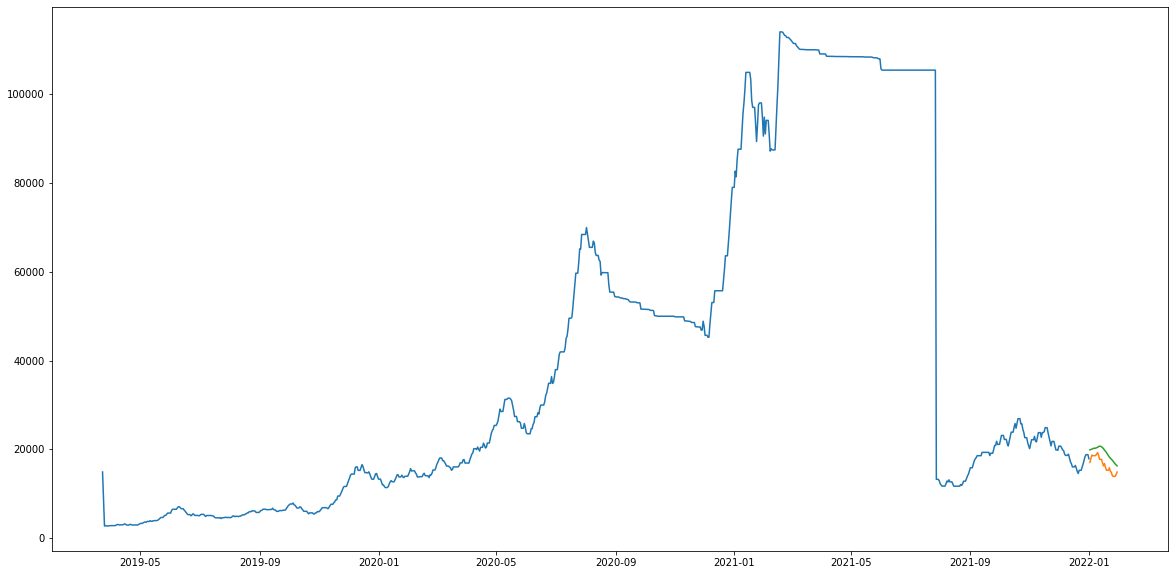

In [103]:
train_data=new_dataset[:TRAIN_NUM]
valid_data=new_dataset[TRAIN_NUM:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

In [104]:
len_df = len(valid_data['Predictions'])
valid_data['Growth'] = np.nan
valid_data['Growth Percent'] = np.nan

for i in range (len_df-1):
  GrowthPercent =((valid_data['Predictions'][i+1] - valid_data['Close'][i])/ valid_data['Close'][i])*100
  valid_data['Growth Percent'][i+1] = GrowthPercent
  status = "-"
  if (GrowthPercent > 0.5):
    status = +1
  elif(GrowthPercent < -0.5):
    status = -1
  else:
    status = 0
  valid_data['Growth'][i+1] = status
valid_data.head(100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

,Close,view_count,Predictions,Growth,Growth Percent
Date,,,,,
2022-01-02,17080.0,151452,19903.158203,NaN,NaN
2022-01-03,17900.0,216154,19989.238281,1.0,17.033011
2022-01-04,18720.0,176878,20066.669922,1.0,12.104301
2022-01-05,18600.0,129549,20175.496094,1.0,7.775086
2022-01-06,18600.0,1841,20260.039062,1.0,8.924941
2022-01-07,18600.0,11859,20283.005859,1.0,9.048419
2022-01-08,18620.0,296520,20289.966797,1.0,9.085843
2022-01-09,18980.0,34483,20401.179688,1.0,9.565949
2022-01-10,19280.0,273413,20486.466797,1.0,7.937127


In [106]:
from sklearn.metrics import mean_squared_error
test_y = valid_data['Close'].values
pred_y = valid_data['Predictions'].values

test_y= test_y.tolist()
pred_y= pred_y.tolist()
#print(pred_y)
errors = mean_squared_error(test_y, pred_y)/10000
# report error
print("errors " ,errors)

errors  751.8368603874766
